<a href="https://colab.research.google.com/github/bcalik94/Multimodal-Speech-Summarisation-/blob/main/FisherScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



Load normalized sets with selected random 20000 indices

In [ ]:
pickle_off = open ("/content/drive/MyDrive/data/ZNormed_corpus_2000.txt", "rb")
ZNormed_corpus = pickle.load(pickle_off).sort_values('sentence_id').reset_index(drop = True)


pickle_off = open ("/content/drive/MyDrive/data/ZNormedperSpeaker_2000.txt", "rb")
ZNormedperSpeaker_corpus = pickle.load(pickle_off).sort_values('sentence_id').reset_index(drop = True)


pickle_off = open ("/content/drive/MyDrive/data/ZNormedperSpeaker_MinMax_corpus_2000.txt", "rb")
ZNormedperSpeaker_MinMax_corpus = pickle.load(pickle_off).sort_values('sentence_id').reset_index(drop = True)


pickle_off = open ("/content/drive/MyDrive/data/ZNormedperSpeaker_L2_2000", "rb")
ZNormedperSpeaker_L2_corpus = pickle.load(pickle_off).sort_values('sentence_id').reset_index(drop = True)



In [ ]:
########### 

pickle_off = open ("/content/drive/MyDrive/data/2000episodes.txt", "rb")
corpus = pickle.load(pickle_off)
all_cols = [col for col in corpus if col.startswith('MAX') or col.startswith('MEAN') or col.startswith('MIN') ]

##### Normalisation per Speaker #####
temp_df = pd.DataFrame()
temp_df = corpus[all_cols]
temp_df['doc_id'] = corpus['doc_id'] 
temp_df['speakerTag'] = corpus['speakerTag'] 

groups = temp_df.groupby(['doc_id','speakerTag'])
mean, std = groups.transform("mean"), groups.transform("std")
ZnormalizedperSpeaker_subdf = (temp_df[all_cols] - mean) / std

ZNormedperSpeaker = corpus.copy()
ZNormedperSpeaker[all_cols] = ZnormalizedperSpeaker_subdf

ZNormedperSpeaker = ZNormedperSpeaker.dropna()
from sklearn import preprocessing
ZNormedperSpeaker_L2 = ZNormedperSpeaker.copy().reset_index(drop=True)
ZNormedperSpeaker_L2[all_cols] = pd.DataFrame(preprocessing.normalize(ZNormedperSpeaker[all_cols].values, norm='l2'), columns = all_cols)


with open('ZNormedperSpeaker_2000.txt', 'wb') as f1:
   pickle.dump(ZNormedperSpeaker, f1)
with open('ZNormedperSpeaker_L2_2000', 'wb') as f1:
   pickle.dump(ZNormedperSpeaker_L2, f1)
#described.loc[[1459,2496],:] --> 2049,3266

In [ ]:

def ZNorm(df):
   b = pd.DataFrame()
   temp_df_1 = df[all_cols]
   b = df
   b[all_cols] =(temp_df_1-temp_df_1.mean())/temp_df_1.std()

   return b

def MinMaxNorm(df):
  c = pd.DataFrame()
  temp_df_2 = df[all_cols]
  c = df
  c[all_cols]=(temp_df_2-temp_df_2.min())/(temp_df_2.max()-temp_df_2.min())

  return c

#ZNorm for all corpus
ZNormed = corpus.copy()
ZNormed[all_cols] = ZNormed[all_cols].apply(lambda x: (x - x.mean()) / (x.std()))

with open('ZNormed_corpus_2000.txt', 'wb') as f1:
   pickle.dump(ZNormed, f1)


# Normalize using Min/Max Normalization.
ZNormedperSpeaker_MinMax = ZNormedperSpeaker.copy()

ZNormedperSpeaker_MinMax[all_cols] = ZNormedperSpeaker[all_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

with open('ZNormedperSpeaker_MinMax_2000.txt', 'wb') as f1:
   pickle.dump(ZNormedperSpeaker_MinMax, f1)


In [ ]:

max_cols = [col for col in ZNormedperSpeaker_corpus  if col.startswith('MAX')]
min_cols = [col for col in ZNormedperSpeaker_corpus  if col.startswith('MIN')]
mean_cols = [col for col in ZNormedperSpeaker_corpus  if col.startswith('MEAN')]
all_cols = [col for col in ZNormedperSpeaker_corpus  if col.startswith('MAX') or col.startswith('MEAN') or col.startswith('MIN') ]

In [ ]:
other_cols = ['sentence_id',
 'doc_id',
 'show_name',
 'episode_id',
 'Description',
 'Transcript',
 'speakerTag',
 'sentence',
  'rouge_score',
 'label_range_perdoc',
 'label_score'] 


F0semitone = ['MEAN:F0semitoneFrom27.5Hz_sma3nz_amean',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'MEAN:F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope']



F0semitone += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), F0semitone)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F0semitone))
F0semitone.remove('MIN:F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope')
F0semitone.remove('MIN:F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope')
F0semitone.remove('MIN:F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope')



loudness = ['MEAN:loudness_sma3_amean',
 'MEAN:loudness_sma3_stddevNorm',
 'MEAN:loudness_sma3_percentile20.0',
 'MEAN:loudness_sma3_percentile50.0',
 'MEAN:loudness_sma3_percentile80.0',
 'MEAN:loudness_sma3_pctlrange0-2',
 'MEAN:loudness_sma3_meanRisingSlope',
 'MEAN:loudness_sma3_stddevRisingSlope',
 'MEAN:loudness_sma3_meanFallingSlope',
 'MEAN:loudness_sma3_stddevFallingSlope', 
 'MEAN:loudnessPeaksPerSec']

loudness += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), loudness)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), loudness))


spectral_Flux = ['MEAN:spectralFlux_sma3_amean',
 'MEAN:spectralFlux_sma3_stddevNorm', 
 'MEAN:spectralFluxV_sma3nz_amean',
 'MEAN:spectralFluxV_sma3nz_stddevNorm', 
 'MEAN:spectralFluxUV_sma3nz_amean']

spectral_Flux += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), spectral_Flux)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), spectral_Flux))

mfcc = ['MEAN:mfcc1_sma3_amean',
 'MEAN:mfcc1_sma3_stddevNorm',
 'MEAN:mfcc2_sma3_amean',
 'MEAN:mfcc2_sma3_stddevNorm',
 'MEAN:mfcc3_sma3_amean',
 'MEAN:mfcc3_sma3_stddevNorm',
 'MEAN:mfcc4_sma3_amean',
 'MEAN:mfcc4_sma3_stddevNorm',
 'MEAN:mfcc1V_sma3nz_amean',
 'MEAN:mfcc1V_sma3nz_stddevNorm',
 'MEAN:mfcc2V_sma3nz_amean',
 'MEAN:mfcc2V_sma3nz_stddevNorm',
 'MEAN:mfcc3V_sma3nz_amean',
 'MEAN:mfcc3V_sma3nz_stddevNorm',
 'MEAN:mfcc4V_sma3nz_amean',
 'MEAN:mfcc4V_sma3nz_stddevNorm']

mfcc += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), mfcc)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), mfcc))


jitter = ['MEAN:jitterLocal_sma3nz_amean',
 'MEAN:jitterLocal_sma3nz_stddevNorm']

jitter += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), jitter)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), jitter))


shimmer = ['MEAN:shimmerLocaldB_sma3nz_amean',
 'MEAN:shimmerLocaldB_sma3nz_stddevNorm']

shimmer += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), shimmer)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), shimmer))


HNR = ['MEAN:HNRdBACF_sma3nz_amean',
 'MEAN:HNRdBACF_sma3nz_stddevNorm']

HNR += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), HNR)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), HNR))


H1_A3 = ['MEAN:logRelF0-H1-H2_sma3nz_amean',
 'MEAN:logRelF0-H1-H2_sma3nz_stddevNorm',
 'MEAN:logRelF0-H1-A3_sma3nz_amean',
 'MEAN:logRelF0-H1-A3_sma3nz_stddevNorm']

H1_A3 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), H1_A3)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), H1_A3))


F1 = ['MEAN:F1frequency_sma3nz_stddevNorm',
 'MEAN:F1bandwidth_sma3nz_amean',
 'MEAN:F1bandwidth_sma3nz_stddevNorm',
 'MEAN:F1amplitudeLogRelF0_sma3nz_amean',
 'MEAN:F1amplitudeLogRelF0_sma3nz_stddevNorm']

F1 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), F1)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F1))


F2 = ['MEAN:F2frequency_sma3nz_amean',
 'MEAN:F2frequency_sma3nz_stddevNorm',
 'MEAN:F2bandwidth_sma3nz_amean',
 'MEAN:F2bandwidth_sma3nz_stddevNorm',
 'MEAN:F2amplitudeLogRelF0_sma3nz_amean',
 'MEAN:F2amplitudeLogRelF0_sma3nz_stddevNorm']

F2 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), F2)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F2))


F3 = ['MEAN:F3frequency_sma3nz_amean',
 'MEAN:F3frequency_sma3nz_stddevNorm',
 'MEAN:F3bandwidth_sma3nz_amean',
 'MEAN:F3bandwidth_sma3nz_stddevNorm',
 'MEAN:F3amplitudeLogRelF0_sma3nz_amean',
 'MEAN:F3amplitudeLogRelF0_sma3nz_stddevNorm']

F3 += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'),F3)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), F3))


alphaRatio = ['MEAN:alphaRatioV_sma3nz_amean',
 'MEAN:alphaRatioV_sma3nz_stddevNorm',
 'MEAN:alphaRatioUV_sma3nz_amean']

alphaRatio  += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), alphaRatio )) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), alphaRatio ))

hammarberg = ['MEAN:hammarbergIndexV_sma3nz_amean',
 'MEAN:hammarbergIndexV_sma3nz_stddevNorm', 
 'MEAN:hammarbergIndexUV_sma3nz_amean']

hammarberg += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), hammarberg)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), hammarberg))


slopeV = ['MEAN:slopeV0-500_sma3nz_amean',
 'MEAN:slopeV0-500_sma3nz_stddevNorm',
 'MEAN:slopeV500-1500_sma3nz_amean',
 'MEAN:slopeV500-1500_sma3nz_stddevNorm', 
 'MEAN:slopeUV0-500_sma3nz_amean',
 'MEAN:slopeUV500-1500_sma3nz_amean']

slopeV  += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), slopeV )) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), slopeV ))

Segments = ['MEAN:VoicedSegmentsPerSec',
 'MEAN:MeanVoicedSegmentLengthSec',
 'MEAN:StddevVoicedSegmentLengthSec',
 'MEAN:MeanUnvoicedSegmentLength',
 'MEAN:StddevUnvoicedSegmentLength',
 'MEAN:equivalentSoundLevel_dBp']

Segments += list(map(lambda x: str(x).replace('MEAN:', 'MIN:'), Segments)) + list(map(lambda x: str(x).replace('MEAN:', 'MAX:'), Segments))
#Remove features which have 0 stds
Segments.remove('MIN:VoicedSegmentsPerSec')
Segments.remove('MIN:StddevVoicedSegmentLengthSec')
Segments.remove('MIN:StddevUnvoicedSegmentLength')
Segments.remove('MIN:MeanUnvoicedSegmentLength')
Segments.remove('MAX:MeanVoicedSegmentLengthSec')



LLDs ={'F0semitone':F0semitone, 'loudness': loudness, 'spectral_Flux': spectral_Flux, 'mfcc': mfcc,'jitter': jitter,'shimmer': shimmer,'HNR':HNR ,'H1_A3': H1_A3, 'F1': F1, 'F2': F2,'F3' :F3,'alphaRatio': alphaRatio, 'hammarberg': hammarberg, 'slopeV': slopeV, 'Segments': Segments  }

In [ ]:
import numpy as np
from scipy.sparse import *
from sklearn.metrics.pairwise import pairwise_distances


def construct_W(X, **kwargs):
    """
    Construct the affinity matrix W through different ways
    Notes
    -----
    if kwargs is null, use the default parameter settings;
    if kwargs is not null, construct the affinity matrix according to parameters in kwargs
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    kwargs: {dictionary}
        parameters to construct different affinity matrix W:
        y: {numpy array}, shape (n_samples, 1)
            the true label information needed under the 'supervised' neighbor mode
        metric: {string}
            choices for different distance measures
            'euclidean' - use euclidean distance
            'cosine' - use cosine distance (default)
        neighbor_mode: {string}
            indicates how to construct the graph
            'knn' - put an edge between two nodes if and only if they are among the
                    k nearest neighbors of each other (default)
            'supervised' - put an edge between two nodes if they belong to same class
                    and they are among the k nearest neighbors of each other
        weight_mode: {string}
            indicates how to assign weights for each edge in the graph
            'binary' - 0-1 weighting, every edge receives weight of 1 (default)
            'heat_kernel' - if nodes i and j are connected, put weight W_ij = exp(-norm(x_i - x_j)/2t^2)
                            this weight mode can only be used under 'euclidean' metric and you are required
                            to provide the parameter t
            'cosine' - if nodes i and j are connected, put weight cosine(x_i,x_j).
                        this weight mode can only be used under 'cosine' metric
        k: {int}
            choices for the number of neighbors (default k = 5)
        t: {float}
            parameter for the 'heat_kernel' weight_mode
        fisher_score: {boolean}
            indicates whether to build the affinity matrix in a fisher score way, in which W_ij = 1/n_l if yi = yj = l;
            otherwise W_ij = 0 (default fisher_score = false)
        reliefF: {boolean}
            indicates whether to build the affinity matrix in a reliefF way, NH(x) and NM(x,y) denotes a set of
            k nearest points to x with the same class as x, and a different class (the class y), respectively.
            W_ij = 1 if i = j; W_ij = 1/k if x_j \in NH(x_i); W_ij = -1/(c-1)k if x_j \in NM(x_i, y) (default reliefF = false)
    Output
    ------
    W: {sparse matrix}, shape (n_samples, n_samples)
        output affinity matrix W
    """

    # default metric is 'cosine'
    if 'metric' not in kwargs.keys():
        kwargs['metric'] = 'cosine'

    # default neighbor mode is 'knn' and default neighbor size is 5
    if 'neighbor_mode' not in kwargs.keys():
        kwargs['neighbor_mode'] = 'knn'
    if kwargs['neighbor_mode'] == 'knn' and 'k' not in kwargs.keys():
        kwargs['k'] = 5
    if kwargs['neighbor_mode'] == 'supervised' and 'k' not in kwargs.keys():
        kwargs['k'] = 5
    if kwargs['neighbor_mode'] == 'supervised' and 'y' not in kwargs.keys():
        print ('Warning: label is required in the supervised neighborMode!!!')
        exit(0)

    # default weight mode is 'binary', default t in heat kernel mode is 1
    if 'weight_mode' not in kwargs.keys():
        kwargs['weight_mode'] = 'binary'
    if kwargs['weight_mode'] == 'heat_kernel':
        if kwargs['metric'] != 'euclidean':
            kwargs['metric'] = 'euclidean'
        if 't' not in kwargs.keys():
            kwargs['t'] = 1
    elif kwargs['weight_mode'] == 'cosine':
        if kwargs['metric'] != 'cosine':
            kwargs['metric'] = 'cosine'

    # default fisher_score and reliefF mode are 'false'
    if 'fisher_score' not in kwargs.keys():
        kwargs['fisher_score'] = False
    if 'reliefF' not in kwargs.keys():
        kwargs['reliefF'] = False

    n_samples, n_features = np.shape(X)

    # choose 'knn' neighbor mode
    if kwargs['neighbor_mode'] == 'knn':
        k = kwargs['k']
        if kwargs['weight_mode'] == 'binary':
            if kwargs['metric'] == 'euclidean':
                # compute pairwise euclidean distances
                D = pairwise_distances(X)
                D **= 2
                # sort the distance matrix D in ascending order
                dump = np.sort(D, axis=1)
                idx = np.argsort(D, axis=1)
                # choose the k-nearest neighbors for each instance
                idx_new = idx[:, 0:k+1]
                G = np.zeros((n_samples*(k+1), 3))
                G[:, 0] = np.tile(np.arange(n_samples), (k+1, 1)).reshape(-1)
                G[:, 1] = np.ravel(idx_new, order='F')
                G[:, 2] = 1
                # build the sparse affinity matrix W
                W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
                bigger = np.transpose(W) > W
                W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
                return W

            elif kwargs['metric'] == 'cosine':
                # normalize the data first
                X_normalized = np.power(np.sum(X*X, axis=1), 0.5)
                for i in range(n_samples):
                    X[i, :] = X[i, :]/max(1e-12, X_normalized[i])
                # compute pairwise cosine distances
                D_cosine = np.dot(X, np.transpose(X))
                # sort the distance matrix D in descending order
                dump = np.sort(-D_cosine, axis=1)
                idx = np.argsort(-D_cosine, axis=1)
                idx_new = idx[:, 0:k+1]
                G = np.zeros((n_samples*(k+1), 3))
                G[:, 0] = np.tile(np.arange(n_samples), (k+1, 1)).reshape(-1)
                G[:, 1] = np.ravel(idx_new, order='F')
                G[:, 2] = 1
                # build the sparse affinity matrix W
                W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
                bigger = np.transpose(W) > W
                W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
                return W

        elif kwargs['weight_mode'] == 'heat_kernel':
            t = kwargs['t']
            # compute pairwise euclidean distances
            D = pairwise_distances(X)
            D **= 2
            # sort the distance matrix D in ascending order
            dump = np.sort(D, axis=1)
            idx = np.argsort(D, axis=1)
            idx_new = idx[:, 0:k+1]
            dump_new = dump[:, 0:k+1]
            # compute the pairwise heat kernel distances
            dump_heat_kernel = np.exp(-dump_new/(2*t*t))
            G = np.zeros((n_samples*(k+1), 3))
            G[:, 0] = np.tile(np.arange(n_samples), (k+1, 1)).reshape(-1)
            G[:, 1] = np.ravel(idx_new, order='F')
            G[:, 2] = np.ravel(dump_heat_kernel, order='F')
            # build the sparse affinity matrix W
            W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
            bigger = np.transpose(W) > W
            W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
            return W

        elif kwargs['weight_mode'] == 'cosine':
            # normalize the data first
            X_normalized = np.power(np.sum(X*X, axis=1), 0.5)
            for i in range(n_samples):
                    X[i, :] = X[i, :]/max(1e-12, X_normalized[i])
            # compute pairwise cosine distances
            D_cosine = np.dot(X, np.transpose(X))
            # sort the distance matrix D in ascending order
            dump = np.sort(-D_cosine, axis=1)
            idx = np.argsort(-D_cosine, axis=1)
            idx_new = idx[:, 0:k+1]
            dump_new = -dump[:, 0:k+1]
            G = np.zeros((n_samples*(k+1), 3))
            G[:, 0] = np.tile(np.arange(n_samples), (k+1, 1)).reshape(-1)
            G[:, 1] = np.ravel(idx_new, order='F')
            G[:, 2] = np.ravel(dump_new, order='F')
            # build the sparse affinity matrix W
            W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
            bigger = np.transpose(W) > W
            W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
            return W

    # choose supervised neighborMode
    elif kwargs['neighbor_mode'] == 'supervised':
        k = kwargs['k']
        # get true labels and the number of classes
        y = kwargs['y']
        label = np.unique(y)
        n_classes = np.unique(y).size
        # construct the weight matrix W in a fisherScore way, W_ij = 1/n_l if yi = yj = l, otherwise W_ij = 0
        if kwargs['fisher_score'] is True:
            W = lil_matrix((n_samples, n_samples))
            for i in range(n_classes):
                class_idx = (y == label[i])
                class_idx_all = (class_idx[:, np.newaxis] & class_idx[np.newaxis, :])
                W[class_idx_all] = 1.0/np.sum(np.sum(class_idx))
            return W

        # construct the weight matrix W in a reliefF way, NH(x) and NM(x,y) denotes a set of k nearest
        # points to x with the same class as x, a different class (the class y), respectively. W_ij = 1 if i = j;
        # W_ij = 1/k if x_j \in NH(x_i); W_ij = -1/(c-1)k if x_j \in NM(x_i, y)
        if kwargs['reliefF'] is True:
            # when xj in NH(xi)
            G = np.zeros((n_samples*(k+1), 3))
            id_now = 0
            for i in range(n_classes):
                class_idx = np.column_stack(np.where(y == label[i]))[:, 0]
                D = pairwise_distances(X[class_idx, :])
                D **= 2
                idx = np.argsort(D, axis=1)
                idx_new = idx[:, 0:k+1]
                n_smp_class = (class_idx[idx_new[:]]).size
                if len(class_idx) <= k:
                    k = len(class_idx) - 1
                G[id_now:n_smp_class+id_now, 0] = np.tile(class_idx, (k+1, 1)).reshape(-1)
                G[id_now:n_smp_class+id_now, 1] = np.ravel(class_idx[idx_new[:]], order='F')
                G[id_now:n_smp_class+id_now, 2] = 1.0/k
                id_now += n_smp_class
            W1 = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
            # when i = j, W_ij = 1
            for i in range(n_samples):
                W1[i, i] = 1
            # when x_j in NM(x_i, y)
            G = np.zeros((n_samples*k*(n_classes - 1), 3))
            id_now = 0
            for i in range(n_classes):
                class_idx1 = np.column_stack(np.where(y == label[i]))[:, 0]
                X1 = X[class_idx1, :]
                for j in range(n_classes):
                    if label[j] != label[i]:
                        class_idx2 = np.column_stack(np.where(y == label[j]))[:, 0]
                        X2 = X[class_idx2, :]
                        D = pairwise_distances(X1, X2)
                        idx = np.argsort(D, axis=1)
                        idx_new = idx[:, 0:k]
                        n_smp_class = len(class_idx1)*k
                        G[id_now:n_smp_class+id_now, 0] = np.tile(class_idx1, (k, 1)).reshape(-1)
                        G[id_now:n_smp_class+id_now, 1] = np.ravel(class_idx2[idx_new[:]], order='F')
                        G[id_now:n_smp_class+id_now, 2] = -1.0/((n_classes-1)*k)
                        id_now += n_smp_class
            W2 = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
            bigger = np.transpose(W2) > W2
            W2 = W2 - W2.multiply(bigger) + np.transpose(W2).multiply(bigger)
            W = W1 + W2
            return W

        if kwargs['weight_mode'] == 'binary':
            if kwargs['metric'] == 'euclidean':
                G = np.zeros((n_samples*(k+1), 3))
                id_now = 0
                for i in range(n_classes):
                    class_idx = np.column_stack(np.where(y == label[i]))[:, 0]
                    # compute pairwise euclidean distances for instances in class i
                    D = pairwise_distances(X[class_idx, :])
                    D **= 2
                    # sort the distance matrix D in ascending order for instances in class i
                    idx = np.argsort(D, axis=1)
                    idx_new = idx[:, 0:k+1]
                    n_smp_class = len(class_idx)*(k+1)
                    G[id_now:n_smp_class+id_now, 0] = np.tile(class_idx, (k+1, 1)).reshape(-1)
                    G[id_now:n_smp_class+id_now, 1] = np.ravel(class_idx[idx_new[:]], order='F')
                    G[id_now:n_smp_class+id_now, 2] = 1
                    id_now += n_smp_class
                # build the sparse affinity matrix W
                W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
                bigger = np.transpose(W) > W
                W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
                return W

            if kwargs['metric'] == 'cosine':
                # normalize the data first
                X_normalized = np.power(np.sum(X*X, axis=1), 0.5)
                for i in range(n_samples):
                    X[i, :] = X[i, :]/max(1e-12, X_normalized[i])
                G = np.zeros((n_samples*(k+1), 3))
                id_now = 0
                for i in range(n_classes):
                    class_idx = np.column_stack(np.where(y == label[i]))[:, 0]
                    # compute pairwise cosine distances for instances in class i
                    D_cosine = np.dot(X[class_idx, :], np.transpose(X[class_idx, :]))
                    # sort the distance matrix D in descending order for instances in class i
                    idx = np.argsort(-D_cosine, axis=1)
                    idx_new = idx[:, 0:k+1]
                    n_smp_class = len(class_idx)*(k+1)
                    G[id_now:n_smp_class+id_now, 0] = np.tile(class_idx, (k+1, 1)).reshape(-1)
                    G[id_now:n_smp_class+id_now, 1] = np.ravel(class_idx[idx_new[:]], order='F')
                    G[id_now:n_smp_class+id_now, 2] = 1
                    id_now += n_smp_class
                # build the sparse affinity matrix W
                W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
                bigger = np.transpose(W) > W
                W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
                return W

        elif kwargs['weight_mode'] == 'heat_kernel':
            G = np.zeros((n_samples*(k+1), 3))
            id_now = 0
            for i in range(n_classes):
                class_idx = np.column_stack(np.where(y == label[i]))[:, 0]
                # compute pairwise cosine distances for instances in class i
                D = pairwise_distances(X[class_idx, :])
                D **= 2
                # sort the distance matrix D in ascending order for instances in class i
                dump = np.sort(D, axis=1)
                idx = np.argsort(D, axis=1)
                idx_new = idx[:, 0:k+1]
                dump_new = dump[:, 0:k+1]
                t = kwargs['t']
                # compute pairwise heat kernel distances for instances in class i
                dump_heat_kernel = np.exp(-dump_new/(2*t*t))
                n_smp_class = len(class_idx)*(k+1)
                G[id_now:n_smp_class+id_now, 0] = np.tile(class_idx, (k+1, 1)).reshape(-1)
                G[id_now:n_smp_class+id_now, 1] = np.ravel(class_idx[idx_new[:]], order='F')
                G[id_now:n_smp_class+id_now, 2] = np.ravel(dump_heat_kernel, order='F')
                id_now += n_smp_class
            # build the sparse affinity matrix W
            W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
            bigger = np.transpose(W) > W
            W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
            return W

        elif kwargs['weight_mode'] == 'cosine':
            # normalize the data first
            X_normalized = np.power(np.sum(X*X, axis=1), 0.5)
            for i in range(n_samples):
                X[i, :] = X[i, :]/max(1e-12, X_normalized[i])
            G = np.zeros((n_samples*(k+1), 3))
            id_now = 0
            for i in range(n_classes):
                class_idx = np.column_stack(np.where(y == label[i]))[:, 0]
                # compute pairwise cosine distances for instances in class i
                D_cosine = np.dot(X[class_idx, :], np.transpose(X[class_idx, :]))
                # sort the distance matrix D in descending order for instances in class i
                dump = np.sort(-D_cosine, axis=1)
                idx = np.argsort(-D_cosine, axis=1)
                idx_new = idx[:, 0:k+1]
                dump_new = -dump[:, 0:k+1]
                n_smp_class = len(class_idx)*(k+1)
                G[id_now:n_smp_class+id_now, 0] = np.tile(class_idx, (k+1, 1)).reshape(-1)
                G[id_now:n_smp_class+id_now, 1] = np.ravel(class_idx[idx_new[:]], order='F')
                G[id_now:n_smp_class+id_now, 2] = np.ravel(dump_new, order='F')
                id_now += n_smp_class
            # build the sparse affinity matrix W
            W = csc_matrix((G[:, 2], (G[:, 0], G[:, 1])), shape=(n_samples, n_samples))
            bigger = np.transpose(W) > W
            W = W - W.multiply(bigger) + np.transpose(W).multiply(bigger)
            return W

In [ ]:
import numpy as np
from scipy.sparse import *
#from skfeature.utility.construct_W import construct_W


def fisher_score(X, y):
    """
    This function implements the fisher score feature selection, steps are as follows:
    1. Construct the affinity matrix W in fisher score way
    2. For the r-th feature, we define fr = X(:,r), D = diag(W*ones), ones = [1,...,1]', L = D - W
    3. Let fr_hat = fr - (fr'*D*ones)*ones/(ones'*D*ones)
    4. Fisher score for the r-th feature is score = (fr_hat'*D*fr_hat)/(fr_hat'*L*fr_hat)-1
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ------
    score: {numpy array}, shape (n_features,)
        fisher score for each feature
    Reference
    ---------
    He, Xiaofei et al. "Laplacian Score for Feature Selection." NIPS 2005.
    Duda, Richard et al. "Pattern classification." John Wiley & Sons, 2012.
    """

    # Construct weight matrix W in a fisherScore way
    kwargs = {"neighbor_mode": "supervised", "fisher_score": True, 'y': y}
    W = construct_W(X, **kwargs)

    # build the diagonal D matrix from affinity matrix W
    D = np.array(W.sum(axis=1))
    L = W
    tmp = np.dot(np.transpose(D), X)
    D = diags(np.transpose(D), [0])
    Xt = np.transpose(X)
    t1 = np.transpose(np.dot(Xt, D.todense()))
    t2 = np.transpose(np.dot(Xt, L.todense()))
    # compute the numerator of Lr
    D_prime = np.sum(np.multiply(t1, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # compute the denominator of Lr
    L_prime = np.sum(np.multiply(t2, X), 0) - np.multiply(tmp, tmp)/D.sum()
    # avoid the denominator of Lr to be 0
    D_prime[D_prime < 1e-12] = 10000
    lap_score = 1 - np.array(np.multiply(L_prime, 1/D_prime))[0, :]

    # compute fisher score from laplacian score, where fisher_score = 1/lap_score - 1
    score = 1.0/lap_score - 1
    return np.transpose(score)


def feature_ranking(score):
    """
    Rank features in descending order according to fisher score, the larger the fisher score, the more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]

In [ ]:
#Find LDA components of combined LLD features
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import product
import itertools

def LDA_for_LLDs(df): 

  LLD_scores = {}
  for LLD in LLDs.keys():
    print(LLD)
    #print(LLDs[LLD])
    X = df[LLDs[LLD]].values
    y = df['label_score']
    #Fit the LDA model
    lda = LinearDiscriminantAnalysis(n_components=1)
    #evaluate model
    transformed = lda.fit(X, y).transform(X)
    #print(LLD)
    #LLD_scores.append({str(LLD) : transformed.T})
    case = {str(LLD) : transformed.T.flatten()}
    LLD_scores.update(case)

  LLD_LDA = pd.DataFrame.from_dict(LLD_scores)

  LLD_LDA['y'] = df.reset_index(drop = True)['label_score']

  return LLD_LDA

In [ ]:
def rank_fishers(LLD_LDA):

  X = LLD_LDA.drop('y', axis = 1).values
  y = LLD_LDA['y'].values

  fisher_scores = fisher_score(X, y)

  fishers = []
  for i in list(feature_ranking(fisher_scores)):
    fishers.append({'Feature': LLD_LDA.columns[i],'Fisher_score':fisher_scores[i]})

  fishers = pd.DataFrame(fishers)

  return fishers


In [ ]:
def rank_subfishers_perLLD(sample, ranked_LLDs):

      ranked = []
      for LLD in LLDs.keys():
        X = sample[LLDs[LLD]].values
        y = sample['label_score'].values
        fisher_scores = fisher_score(X, y)


        for i in list(feature_ranking(fisher_scores)):
          ranked.append({'LLD': LLD, 'Feature': LLDs[LLD][i], 'Fisher_score':fisher_scores[i]})

      ranked = pd.DataFrame(ranked)

      fishers_sorter = ranked_LLDs.Feature.tolist()

      ranked.LLD = ranked.LLD.astype('category')
      ranked.LLD.cat.set_categories(fishers_sorter, inplace=True)
      ranked = ranked.sort_values(['LLD','Fisher_score'], ascending = [True,False]).reset_index(drop=True)
      return ranked


In [ ]:
ZNormedperSpeaker_LLD_LDA = LDA_for_LLDs(ZNormedperSpeaker)
ZNormedperSpeaker_fishers = rank_fishers(ZNormedperSpeaker_LLD_LDA)

ZNormedperSpeaker_L2_LLD_LDA = LDA_for_LLDs(ZNormedperSpeaker_L2_corpus)
ZNormedperSpeaker_L2_fishers = rank_fishers(ZNormedperSpeaker_L2_LLD_LDA)

ZNormedperSpeaker_MinMax_LLD_LDA = LDA_for_LLDs(ZNormedperSpeaker_MinMax_corpus)
ZNormedperSpeaker_MinMax_fishers = rank_fishers(ZNormedperSpeaker_MinMax_LLD_LDA )



NameError: ignored

In [ ]:
ZNormed_LLD_LDA = LDA_for_LLDs(ZNormed_corpus.sample(10000))
ZNormed_fishers = rank_fishers(ZNormed_LLD_LDA)


ZNormedperSpeaker_LLD_LDA = LDA_for_LLDs(ZNormedperSpeaker_corpus.sample(10000))
ZNormedperSpeaker_fishers = rank_fishers(ZNormedperSpeaker_LLD_LDA)

ZNormedperSpeaker_MinMax_LLD_LDA = LDA_for_LLDs(ZNormedperSpeaker_MinMax_corpus.sample(10000))
ZNormedperSpeaker_MinMax_fishers = rank_fishers(ZNormedperSpeaker_MinMax_LLD_LDA )

ZNormedperSpeaker_L2_LLD_LDA = LDA_for_LLDs(ZNormedperSpeaker_L2_corpus.sample(10000))
ZNormedperSpeaker_L2_fishers = rank_fishers(ZNormedperSpeaker_L2_LLD_LDA)

ZNormed_ranked_LLDs = rank_subfishers_perLLD(ZNormed_corpus, ZNormed_fishers)
ZNormedperSpeaker_ranked_LLDs = rank_subfishers_perLLD(ZNormedperSpeaker_corpus, ZNormedperSpeaker_fishers)
ZNormedperSpeaker_MinMax_ranked_LLDs = rank_subfishers_perLLD(ZNormedperSpeaker_MinMax_corpus, ZNormedperSpeaker_MinMax_fishers)
ZNormedperSpeaker_L2_ranked_LLDs = rank_subfishers_perLLD(ZNormedperSpeaker_L2_corpus, ZNormedperSpeaker_L2_fishers)


Feature  Fisher_score
0            mfcc      0.294728
1              F3      0.294331
2        loudness      0.290794
3              F2      0.287365
4        Segments      0.273592
5              F1      0.272812
6      F0semitone      0.265129
7          slopeV      0.252048
8         shimmer      0.225410
9      hammarberg      0.221958
10     alphaRatio      0.220692
11         jitter      0.218450
12  spectral_Flux      0.212250
13          H1_A3      0.201298
14            HNR      0.171903

In [ ]:

LLD_LDA_ZNormed_corpus = pd.concat([ZNormed_corpus[other_cols],ZNormed_LLD_LDA.drop('y', axis = 1)], axis =1)
LLD_LDA_ZNormedperSpeaker_corpus = pd.concat([ ZNormed_corpus[other_cols],ZNormedperSpeaker_LLD_LDA.drop('y', axis = 1)], axis =1)
LLD_LDA_ZNormedperSpeaker_MinMax_corpus =  pd.concat([ ZNormed_corpus[other_cols],ZNormedperSpeaker_MinMax_LLD_LDA.drop('y', axis = 1)], axis =1)
LLD_LDA_ZNormedperSpeaker_L2_corpus = pd.concat([ ZNormedperSpeaker_L2_corpus[other_cols],ZNormedperSpeaker_L2_LLD_LDA.drop('y', axis = 1)], axis =1)





sentence_id doc_id                show_name  \
0               193      2    the very good podcast   
1               194      2    the very good podcast   
2               196      2    the very good podcast   
3               197      2    the very good podcast   
4               198      2    the very good podcast   
...             ...    ...                      ...   
201590       837293   3377  creative people podcast   
201591       837295   3377  creative people podcast   
201592       837296   3377  creative people podcast   
201593       837298   3377  creative people podcast   
201594       837299   3377  creative people podcast   

                                    episode_id  \
0       spotify:episode:3ThCh3ko96O186PYt5qmHi   
1       spotify:episode:3ThCh3ko96O186PYt5qmHi   
2       spotify:episode:3ThCh3ko96O186PYt5qmHi   
3       spotify:episode:3ThCh3ko96O186PYt5qmHi   
4       spotify:episode:3ThCh3ko96O186PYt5qmHi   
...                                        ...   
201590  spotify:episode:67GiwcfLooKnw1NUaOcOu3   
201591  spotify:episode:67GiwcfLooKnw1NUaOcOu3   
201592  spotify:episode:67GiwcfLooKnw1NUaOcOu3   
201593  spotify:episode:67GiwcfLooKnw1NUaOcOu3   
201594  spotify:episode:67GiwcfLooKnw1NUaOcOu3   

                                              Description  \
0       presenting 'the very good podcast' from atlant...   
1       presenting 'the very good podcast' from atlant...   
2       presenting 'the very good podcast' from atlant...   
3       presenting 'the very good podcast' from atlant...   
4       presenting 'the very good podcast' from atlant...   
...                                                   ...   
201590  on episode 3 of wellfed, i visit the new shhho...   
201591  on episode 3 of wellfed, i visit the new shhho...   
201592  on episode 3 of wellfed, i visit the new shhho...   
201593  on episode 3 of wellfed, i visit the new shhho...   
201594  on episode 3 of wellfed, i visit the new shhho...   

                                               Transcript speakerTag  \
0        I love the idea of Family Worship. Where can ...          2   
1        I love the idea of Family Worship. Where can ...          1   
2        I love the idea of Family Worship. Where can ...          1   
3        I love the idea of Family Worship. Where can ...          1   
4        I love the idea of Family Worship. Where can ...          1   
...                                                   ...        ...   
201590   I use very specific Search terms. I'm sure th...          3   
201591   I use very specific Search terms. I'm sure th...          3   
201592   I use very specific Search terms. I'm sure th...          3   
201593   I use very specific Search terms. I'm sure th...          3   
201594   I use very specific Search terms. I'm sure th...          3   

                                                 sentence rouge_score  \
0                        Where can I go from your spirit?    0.043478   
1       It's in our DNA well said Welcome to the very ...    0.214286   
2       I'm the director of communications for Atlanta...         0.2   
3       If you're listening, you're already aware that...    0.067797   
4       Our goal is to give you dear listener relevant...    0.075949   
...                                                   ...         ...   
201590  So yeah the shower cap and zigzag and then yea...    0.111111   
201591                             What is this come out?    0.013889   
201592                 Probably after the New Year great.    0.027586   
201593  Hopefully you've seen it and our Pressed but I...    0.083333   
201594                    I think will be inspiring work.    0.027586   

       label_range_perdoc  ...   shimmer       HNR     H1_A3        F1  \
0         (-0.001, 0.114]  ... -0.660877 -0.798128 -0.267261 -0.670600   
1          (0.114, 0.297]  ...  0.389356 -1.254771 -0.147058 -1.311794   
2          (0.114, 0.297]  ... -0.711160 -0.93928

In [ ]:
pickle_off = open ("/content/drive/MyDrive/data/ZNormedperSpeaker_MinMax_LLD_LDA_2000.txt", "rb")
LLD_LDA_ZNormedperSpeaker_L2_corpus = pickle.load(pickle_off).sort_values('sentence_id').reset_index(drop = True).loc[:99715,:]

LLD_LDA_ZNormedperSpeaker_L2_corpus.loc[:, -14:]

In [ ]:
pickle_off = open ("/content/drive/MyDrive/data/ZNormedperSpeaker_L2_LLD_LDA_2000.txt", "rb")
LLD_LDA_ZNormedperSpeaker_L2_corpus = pickle.load(pickle_off).sort_values('sentence_id').reset_index(drop = True)

Feature :0 F3, Score: 0.22706347703933716
Feature :1 loudness, Score: 0.19378679990768433
Feature :2 mfcc, Score: 0.19349278509616852
Feature :3 F2, Score: 0.12802530825138092
Feature :4 F0semitone, Score: 0.09342238306999207
Feature :5 Segments, Score: 0.08117753267288208
Feature :6 F1, Score: 0.023650800809264183
Feature :7 jitter, Score: 0.016652096062898636
Feature :8 slopeV, Score: 0.015465387143194675
Feature :9 H1_A3, Score: 0.009062869474291801
Feature :10 shimmer, Score: 0.006544158793985844
Feature :11 HNR, Score: 0.0035776810254901648
Feature :12 alphaRatio, Score: 0.003406564937904477
Feature :13 hammarberg, Score: 0.0025306951720267534
Feature :14 spectral_Flux, Score: 0.002141397912055254
<a list of 6 Text major ticklabel objects>


ValueError: ignored

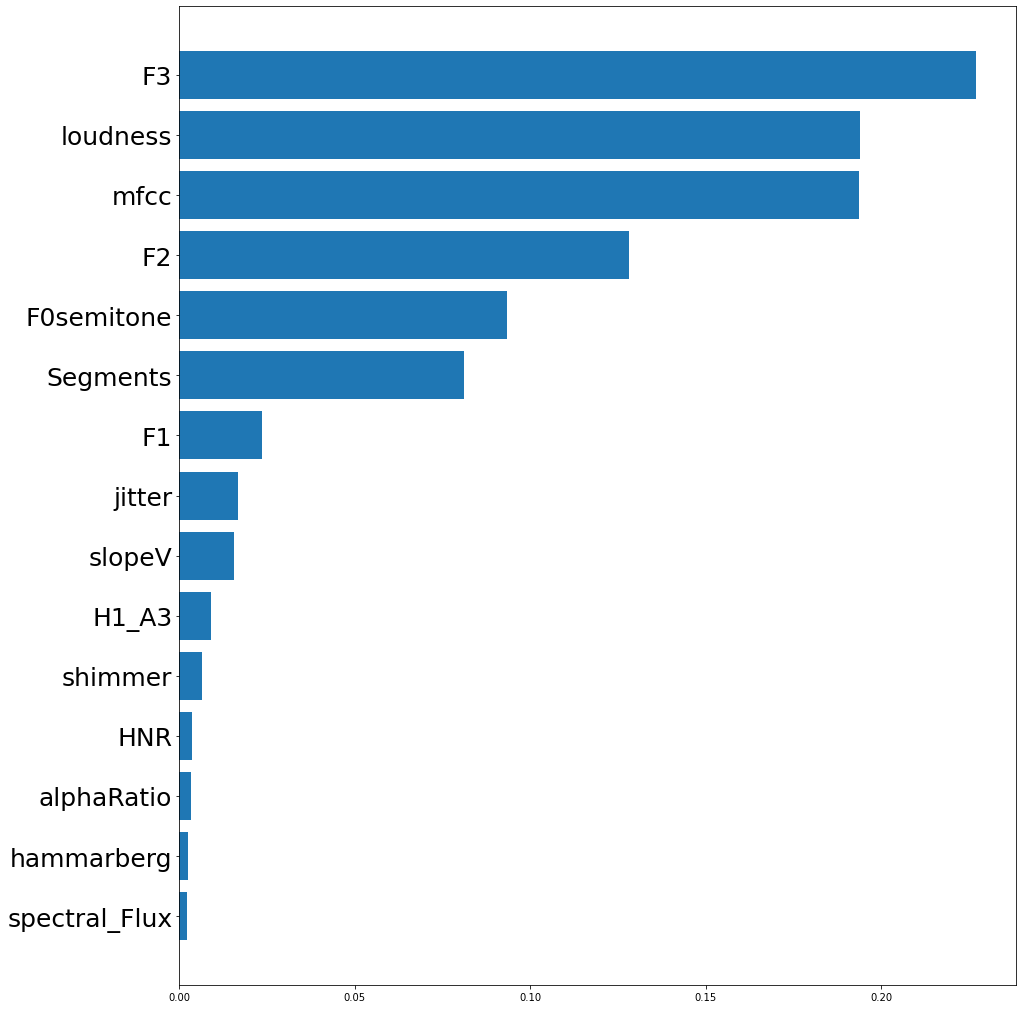

In [ ]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
y = LLD_LDA_ZNormedperSpeaker_L2_corpus['label_score'].to_numpy() 

X = LLD_LDA_ZNormedperSpeaker_L2_corpus[list(LLDs.keys())].to_numpy()

# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance

ranked_features = []
for i,v in enumerate(importance):
  feature = {'feature' : list(LLDs.keys())[i], 'score' : v}
  ranked_features.append(feature)
# plot feature importance
ranked_features = pd.DataFrame(ranked_features).sort_values(by = 'score', ascending = False).reset_index(drop = True)


#After 198th features, feature importance scores are 0

for index,row in ranked_features.iterrows():
  print('Feature :' + str(index) + ' '+ str(row.feature)+ ', Score: '+ str(row.score))

y_pos = np.arange(len(tuple(ranked_features.feature.to_list())))

f, ax = plt.subplots(figsize=(15,18))
hbars = ax.barh(tuple(ranked_features.feature[:44].to_list()), ranked_features.score[:44].to_numpy(), align='center')
ax.set_yticklabels(tuple(ranked_features.feature[:44].to_list()) , fontsize =25)
ax.invert_yaxis() 
print(ax.get_xticklabels())
ax.tick_params(axis='x', font_size=16)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_xlabel('Feature Importance Score')

pyplot.show()
ax.legend(fontsize = 4)
#top10 = ranked_features.iloc[:6,:]['feature'].to_list()
#print(ranked_features.iloc[:10,:])

Let's try with MFCC feature which has the highest Fisher score 

In [ ]:
import plotly.express as px

pca = PCA(n_components=2)
sample = LLD_LDA_ZNormedperSpeaker_L2_corpus
components = pca.fit_transform(sample.loc[:,['mfcc', 'F2', 'F3', 'loudness', 'F0semitone']].values)

fig = px.scatter(components, x=0, y=1, color=sample['label_score'])
fig.show()

In [ ]:

#PCA Components 


PComponents = pd.DataFrame(components, columns = ['PC1', 'PC2'])

PCA_ZNormedperSpeaker_L2_corpus = pd.concat([ LLD_LDA_ZNormedperSpeaker_L2_corpus[other_cols],PComponents], axis =1)

with open('ZNormedperSpeaker_L2_PCA_2000.txt', 'wb') as f1:
   pickle.dump(PCA_ZNormedperSpeaker_L2_corpus, f1)



In [ ]:
pickle_off = open ("/content/drive/MyDrive/data/all_df_2629episodes_afterfilters.txt", "rb")
selected_df = pickle.load(pickle_off)

import random
test_show_list = selected_df['doc_id'].unique().tolist()
test_show_list = test_show_list[:2000]



deneme_df = selected_df[selected_df['doc_id'].isin(test_show_list)]

described= deneme_df.groupby(['doc_id','speakerTag'])[all_cols].agg([ 'std']).reset_index(level=[0,1]).rename(columns = {0:'doc_id'})
docslisttoremove = described.loc[[1459,2496],'doc_id'].tolist()

deneme_df = deneme_df[deneme_df['doc_id'].isin(docslisttoremove)==False]

(described ==0)
toremove = []
for column_name in described[all_cols].columns:
    column = described[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)
    if count >0:
      toremove.append(column_name[0])

corpus = deneme_df.drop(toremove, axis = 1)
all_cols = [col for col in corpus if col.startswith('MAX') or col.startswith('MEAN') or col.startswith('MIN') ]

with open('2000episodes.txt', 'wb') as f1:
   pickle.dump(corpus, f1)

In [ ]:
with open('ZNormedperSpeaker_LLD_LDA.txt', 'wb') as f1:
   pickle.dump(LLD_LDA_ZNormedperSpeaker_corpus, f1)
with open('ZNormed_LLD_LDA.txt', 'wb') as f1:
   pickle.dump(LLD_LDA_ZNormed_corpus, f1)
with open('ZNormedperSpeaker_MinMax_LLD_LDA.txt', 'wb') as f1:
   pickle.dump(LLD_LDA_ZNormedperSpeaker_MinMax_corpus, f1)
with open('ZNormedperSpeaker_L2_LLD_LDA_2000.txt', 'wb') as f1:
   pickle.dump(LLD_LDA_ZNormedperSpeaker_L2_corpus, f1)